<a href="https://colab.research.google.com/github/MPGarg/Assignment-13/blob/main/EVA8_Assigment_13_Part_2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
from __future__ import print_function
import torch.optim as optim
from torchvision import datasets, transforms
import torch
import torch.nn.functional as F
import torchvision
#from torchsummary import summary
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#!pip install -U albumentations
!pip install torch_lr_finder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch_lr_finder import LRFinder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Import files from GIT Hub

In [ ]:
!git clone https://github.com/MPGarg/main_repo.git

Cloning into 'main_repo'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 282 (delta 52), reused 86 (delta 42), pack-reused 178
Receiving objects: 100% (282/282), 90.21 KiB | 3.76 MiB/s, done.
Resolving deltas: 100% (133/133), done.


# VAE class is imported

In [ ]:
from main_repo.models import vae
from main_repo.models.vae import cVAE

# Import Other fuctions

In [ ]:
from main_repo import main, utils
from main_repo.utils import *    
from main_repo.main import *

# Assign device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
from torchsummary import summary
view_model = cVAE((1, 28, 28), 10, nhid = 2, ncond = 16,device=device).to(device)
#summary(view_model, input_size=(1,28,28))
view_model

cVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
    

# Dataset

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                    transform=transforms.ToTensor()),
    batch_size=512, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor(),download=True),
    batch_size=25)

100%|██████████| 9912422/9912422 [00:00<00:00, 290798212.53it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 24159492.19it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 106011793.87it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17287231.19it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



# VAE

In [ ]:
learning_rate = 1e-3
num_epochs = 20
model = cVAE((1, 28, 28), 10, nhid = 2, ncond = 16,device=device).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss(reduction = "sum")

In [ ]:
model_tr1, train_losses1 = fit_model_vae(
                                          model=model, 
                                          device=device,
                                          trainloader=train_loader, 
                                          criterion = criterion,
                                          EPOCHS=20,
                                          optimizer=optimizer,
                                          scheduler=None                                                
                                            )


 EPOCH: 1 (LR: 0.001)


100%|██████████| 118/118 [00:16<00:00,  7.13it/s]



Average Training Loss=227.61015032552083


 EPOCH: 2 (LR: 0.001)


100%|██████████| 118/118 [00:08<00:00, 13.69it/s]



Average Training Loss=164.839809765625


 EPOCH: 3 (LR: 0.001)


100%|██████████| 118/118 [00:10<00:00, 10.78it/s]



Average Training Loss=151.23603071289062


 EPOCH: 4 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 13.10it/s]



Average Training Loss=143.21870589192707


 EPOCH: 5 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 11.96it/s]



Average Training Loss=139.77147436523438


 EPOCH: 6 (LR: 0.001)


100%|██████████| 118/118 [00:08<00:00, 13.12it/s]



Average Training Loss=137.57281292317708


 EPOCH: 7 (LR: 0.001)


100%|██████████| 118/118 [00:08<00:00, 13.25it/s]



Average Training Loss=136.0627007324219


 EPOCH: 8 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 11.90it/s]



Average Training Loss=135.02175


 EPOCH: 9 (LR: 0.001)


100%|██████████| 118/118 [00:14<00:00,  8.10it/s]



Average Training Loss=133.89549248046876


 EPOCH: 10 (LR: 0.001)


100%|██████████| 118/118 [00:08<00:00, 13.21it/s]



Average Training Loss=132.90832718098957


 EPOCH: 11 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 13.06it/s]



Average Training Loss=132.15741560872397


 EPOCH: 12 (LR: 0.001)


100%|██████████| 118/118 [00:08<00:00, 14.10it/s]



Average Training Loss=131.62219949544271


 EPOCH: 13 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 12.87it/s]



Average Training Loss=130.93521072591145


 EPOCH: 14 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 12.89it/s]



Average Training Loss=130.52612428385416


 EPOCH: 15 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 13.08it/s]



Average Training Loss=130.05450159505207


 EPOCH: 16 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 12.78it/s]



Average Training Loss=129.70544827473958


 EPOCH: 17 (LR: 0.001)


100%|██████████| 118/118 [00:08<00:00, 13.19it/s]



Average Training Loss=129.4052667154948


 EPOCH: 18 (LR: 0.001)


100%|██████████| 118/118 [00:08<00:00, 13.15it/s]



Average Training Loss=129.16553325195312


 EPOCH: 19 (LR: 0.001)


100%|██████████| 118/118 [00:09<00:00, 12.41it/s]



Average Training Loss=128.8324226236979


 EPOCH: 20 (LR: 0.001)


100%|██████████| 118/118 [00:08<00:00, 14.49it/s]


Average Training Loss=128.65815727539064



# Generate Image

In [ ]:
number = 9
with torch.no_grad():
    x = model.generate(number)

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import cm

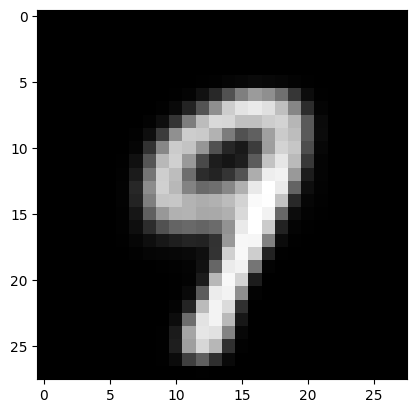

In [ ]:
plt.imshow(x.squeeze(0).cpu().numpy(), cm.gray)

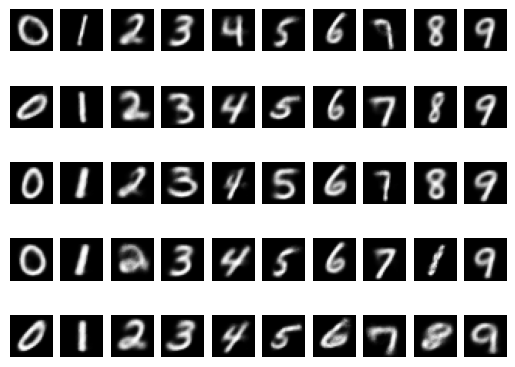

In [ ]:
with torch.no_grad():
    x = model.generate(torch.tensor([list(range(10))] * 5).clone().view(-1))
    
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.axis("off")
    plt.imshow(x[i].squeeze(0).cpu().numpy(), cm.gray)

# Incorrect Labels

In [ ]:
dataiter = iter(test_loader)
data_next = next(dataiter)
images, labels = data_next

In [ ]:
labels_1 = []
for i in labels:
    incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    while incorrect_label == i:
        incorrect_label = torch.randint(low=0, high=10, size=(1,)).item()
    labels_1.append(incorrect_label)

In [ ]:
labels_c = torch.IntTensor(labels_1)
images, labels_c = images.to(device), labels_c.to(device)
with torch.no_grad():
    X_hat1, _,_ = model(images, labels_c)

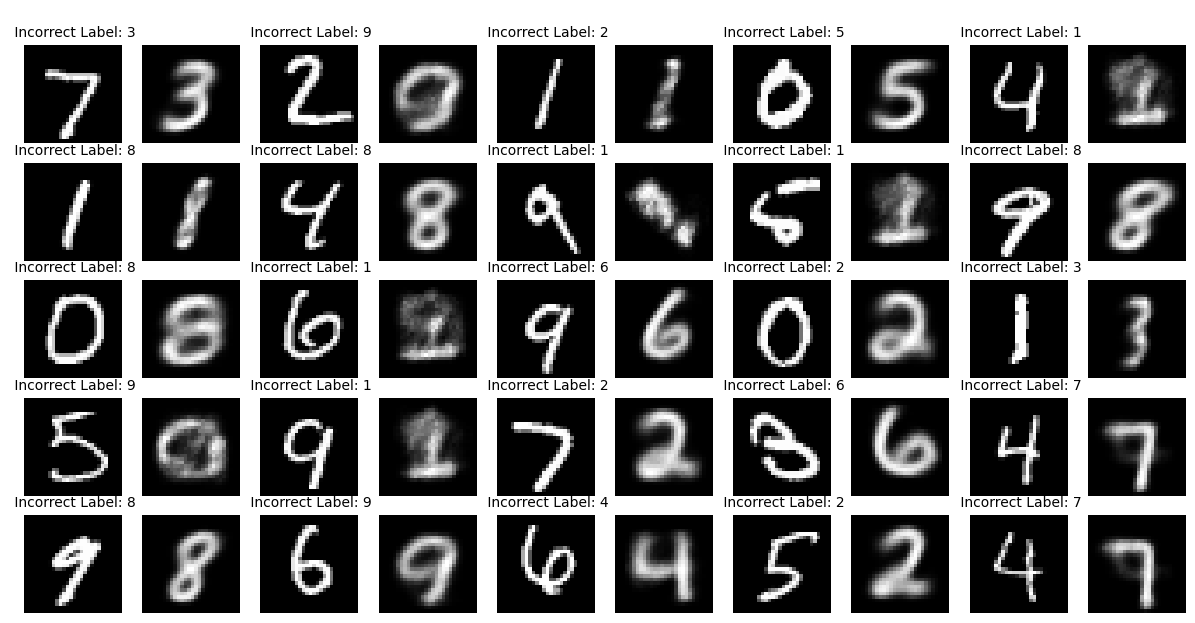

In [ ]:
j = 0
fig = plt.figure(figsize=(15,15))
for i in range(25):
    lbl_corr = labels[i]
    img_corr = images[i]
    img_new = X_hat1[i]
    lbl_new = labels_c[i]
    j = j+1
    ax = fig.add_subplot(10, 10,j )
    ax.axis("off")
    ax.imshow(img_corr.squeeze(0).cpu().numpy(), cm.gray)   
    ax.set_title(f'\n Incorrect Label: {lbl_new.detach()}',fontsize=10)  
    j = j+1
    ax = fig.add_subplot(10, 10, j)
    ax.axis("off")
    ax.imshow(img_new.squeeze(0).cpu().detach().numpy(), cm.gray)  